<a href="https://colab.research.google.com/github/raven-gith/machinelearning1/blob/main/Week%206/clusteringcampaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Upload Data
from google.colab import files
uploaded = files.upload()

Saving clusteringcampaign.csv to clusteringcampaign.csv


In [5]:
# Import Liblary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.spatial.distance import pdist, squareform

# Load dataset
df = pd.read_csv("clusteringcampaign.csv", sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Preprocessing: hanya ambil kolom numerik dan normalisasi
df_clean = df.select_dtypes(include=[np.number]).dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

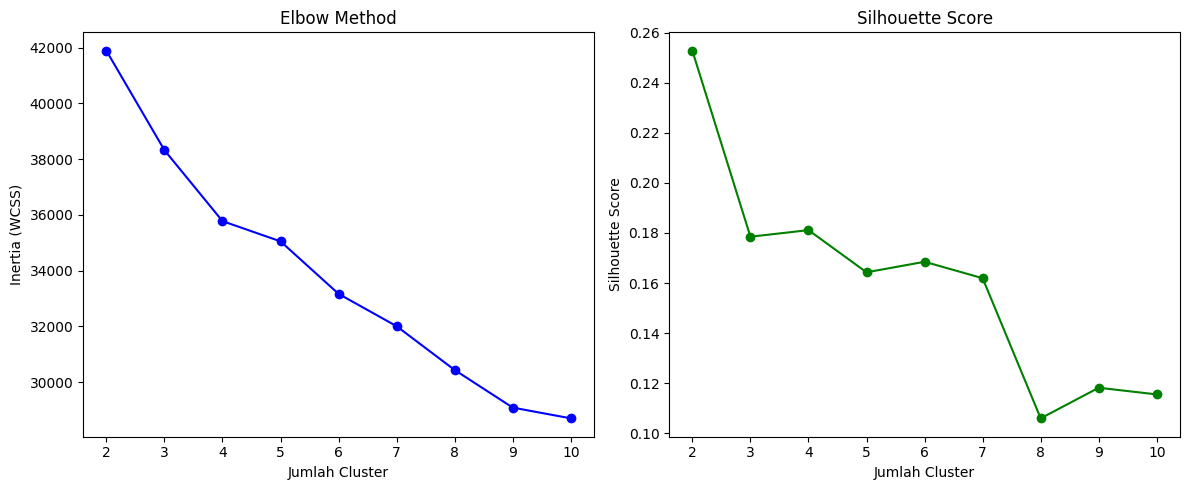

In [7]:
# Elbow Method dan Silhouette Score
inertia = []
silhouette = []

range_n_clusters = range(2, 11)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range_n_clusters, inertia, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')

plt.subplot(1,2,2)
plt.plot(range_n_clusters, silhouette, 'go-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()

In [8]:
# Clustering Model: KMeans & Agglomerative

n_clusters = 4  # Sesuaikan dari grafik hasil Elbow/Silhouette

# KMeans
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=n_clusters)
agg_labels = agg_model.fit_predict(X_scaled)

In [9]:
# Fungsi Dunn Index
def dunn_index(X, labels):
    distances = squareform(pdist(X))
    unique_clusters = np.unique(labels)

    intra_dists = []
    inter_dists = []

    for i in unique_clusters:
        cluster_i = X[labels == i]
        if len(cluster_i) > 1:
            intra = np.max(pdist(cluster_i))
        else:
            intra = 0
        intra_dists.append(intra)

        for j in unique_clusters:
            if i < j:
                cluster_j = X[labels == j]
                dist = np.min(pdist(np.vstack([cluster_i, cluster_j])))
                inter_dists.append(dist)

    return min(inter_dists) / max(intra_dists)

In [10]:
print("=== KMeans Evaluation ===")
print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))
print("Dunn Index:", dunn_index(X_scaled, kmeans_labels))

print("\n=== Agglomerative Clustering Evaluation ===")
print("Silhouette Score:", silhouette_score(X_scaled, agg_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, agg_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, agg_labels))
print("Dunn Index:", dunn_index(X_scaled, agg_labels))

=== KMeans Evaluation ===
Silhouette Score: 0.1811354090560259
Calinski-Harabasz Index: 358.81803691829367
Davies-Bouldin Index: 2.1204768783723305
Dunn Index: 3.1115121295349825e-05

=== Agglomerative Clustering Evaluation ===
Silhouette Score: 0.2048355994667295
Calinski-Harabasz Index: 296.51205535905257
Davies-Bouldin Index: 1.9222087007955502
Dunn Index: 3.1115121295349825e-05


1. Elbow Method – Inertia / WCSS
- Mengukur seberapa padat data di tiap cluster
- Semakin kecil nilainya, semakin baik (cluster lebih rapat)
- Digunakan dalam Elbow Method untuk memilih jumlah cluster terbaik
2. Silhouette Score
- Semakin mendekati 1, semakin bagus (titik dekat dengan cluster-nya & jauh dari cluster lain)
- Digunakan untuk mengevaluasi seberapa baik pengelompokan dilakukan
3. Calinski-Harabasz Index
- Semakin tinggi nilai CH, semakin baik clustering-nya
- Sangat bagus kalau kamu ingin tahu seberapa terpisah dan rapat cluster-nya
4. Davies-Bouldin Index
- Nilai semakin kecil lebih baik
- Karena berarti cluster semakin berbeda dan saling jauh
5. Dunn Index
- Nilai semakin besar semakin bagus
- Artinya: cluster saling berjauhan dan tidak melebar ke mana-mana